### Plot AUC curves from all diseases onto a single plot

In [2]:
# import libraries
# import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def compute_auc(output,target):
    # FIXME: currently if batch has only one class return AUC of 0.5
    if len(np.unique(target)) == 1:
        return 0.5
    
    if len(np.unique(target)) == 2:
        micro_roc_auc_ovo = roc_auc_score(
            target,
            output
        )
    else:
        micro_roc_auc_ovo = roc_auc_score(
            target,
            output,
            multi_class="ovo",
            average="macro",
            labels=np.asarray([0,1,2])
        )
    return micro_roc_auc_ovo

In [21]:
colorlist = sorted(['#e6194b',
'#3cb44b',
'#ffe119',
'#0082c8',
'#f58231',
'#911eb4',
'#46f0f0',
'#f032e6',
'#d2f53c',
'#fabebe',
'#008080',
'#e6beff',
'#aa6e28',
'#fffac8',
'#800000',
'#aaffc3',
'#808000',
'#ffd8b1',
'#000080',
'#808080',
'#ffffff',
'#000000'])

/home/machad/miniconda3/envs/comical-env/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/machad/miniconda3/envs/comical-env/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


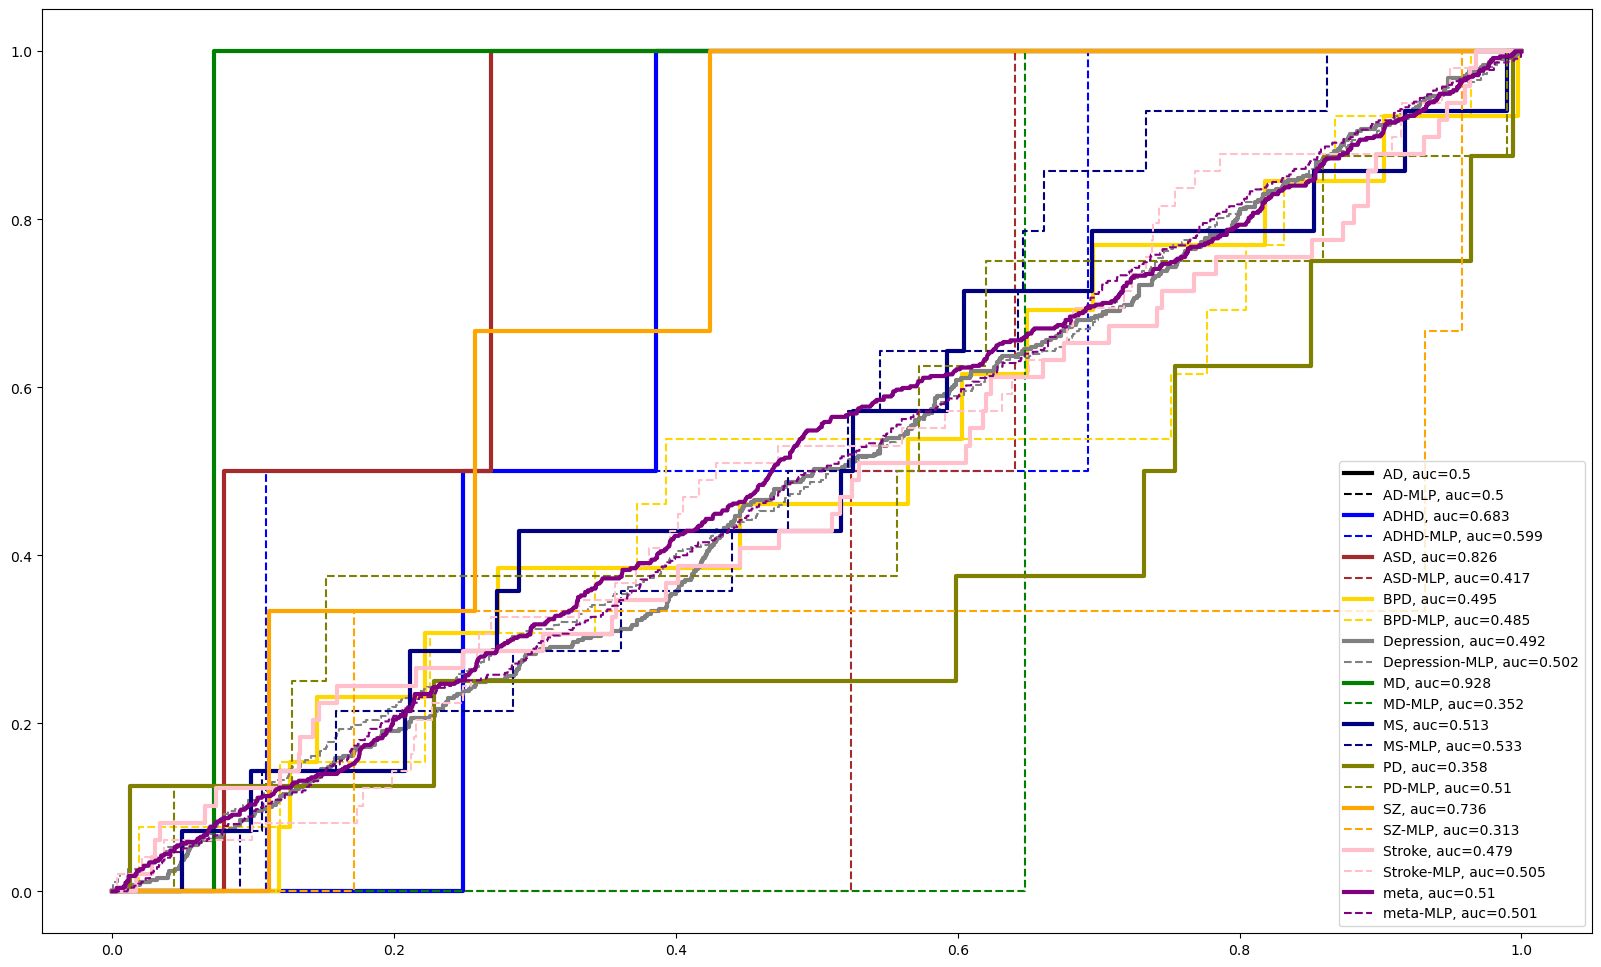

In [26]:
plt.figure(0, figsize=(20,12)).clf()
dir_list = sorted(os.listdir('results'))
file_list = [os.path.join(os.getcwd(),'results',s,'result_dict.json') for s in dir_list]
colorlist = sorted(['red','blue','green','orange','purple','brown','pink','gray','olive','gold', 'black','navy']*2)

for i,f_name in enumerate(file_list):
    if f_name == '/bulk/machad/comical/results/Unamed_run/result_dict.json':
        continue
    df = pd.read_json(f_name)
    pred, label = df['data_auc_plot']['test_preds'], df['data_auc_plot']['test_labels'] 
    pred = [float(s)for s in pred]
    label = [float(s)for s in label]
    fpr, tpr, thresh = metrics.roc_curve(label, pred)
    # auc = metrics.roc_auc_score(label, pred)
    auc = compute_auc(pred,label)
    if f_name.split('/')[-2].split('_')[-1].split('-')[-1] == 'MLP':
        plt.plot(fpr,tpr,label=f"{f_name.split('/')[-2].split('_')[-1]}, auc="+str(np.round(auc,3)), linestyle='dashed', color = colorlist[i-1])
    else:
        plt.plot(fpr,tpr,label=f"{f_name.split('/')[-2].split('_')[-1]}, auc="+str(np.round(auc,3)), linewidth=3, color = colorlist[i-1])
plt.legend(loc=0)
plt.savefig('AUC_per_disease.png')
plt.savefig('AUC_per_disease.pdf')
plt.show() 